In [6]:
import pandas as pd

df = pd.read_excel("../data/dados_cerveja.xlsx")
df


,id,temperatura,copo,espuma,cor,classe
0,1,-5,mud,não,escura,weissbier
1,2,-5,mud,sim,escura,weissbier
2,3,-1,pint,não,clara,weissbier
3,4,-1,pint,sim,clara,weissbier
4,5,-5,pint,não,escura,pale-ale
5,6,-5,pint,não,clara,pale-ale
6,7,-5,pint,sim,escura,pale-ale
7,8,-1,mud,não,clara,pilsen
8,9,-5,mud,não,clara,pilsen
9,10,-1,mud,sim,clara,pilsen


/var/folders/zp/1hd6qt591tg4pc07xp859dw00000gp/T/ipykernel_6162/3903966134.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({
Matplotlib is building the font cache; this may take a moment.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


pale-ale     0.0
pilsen       0.0
weissbier    1.0
dtype: float64

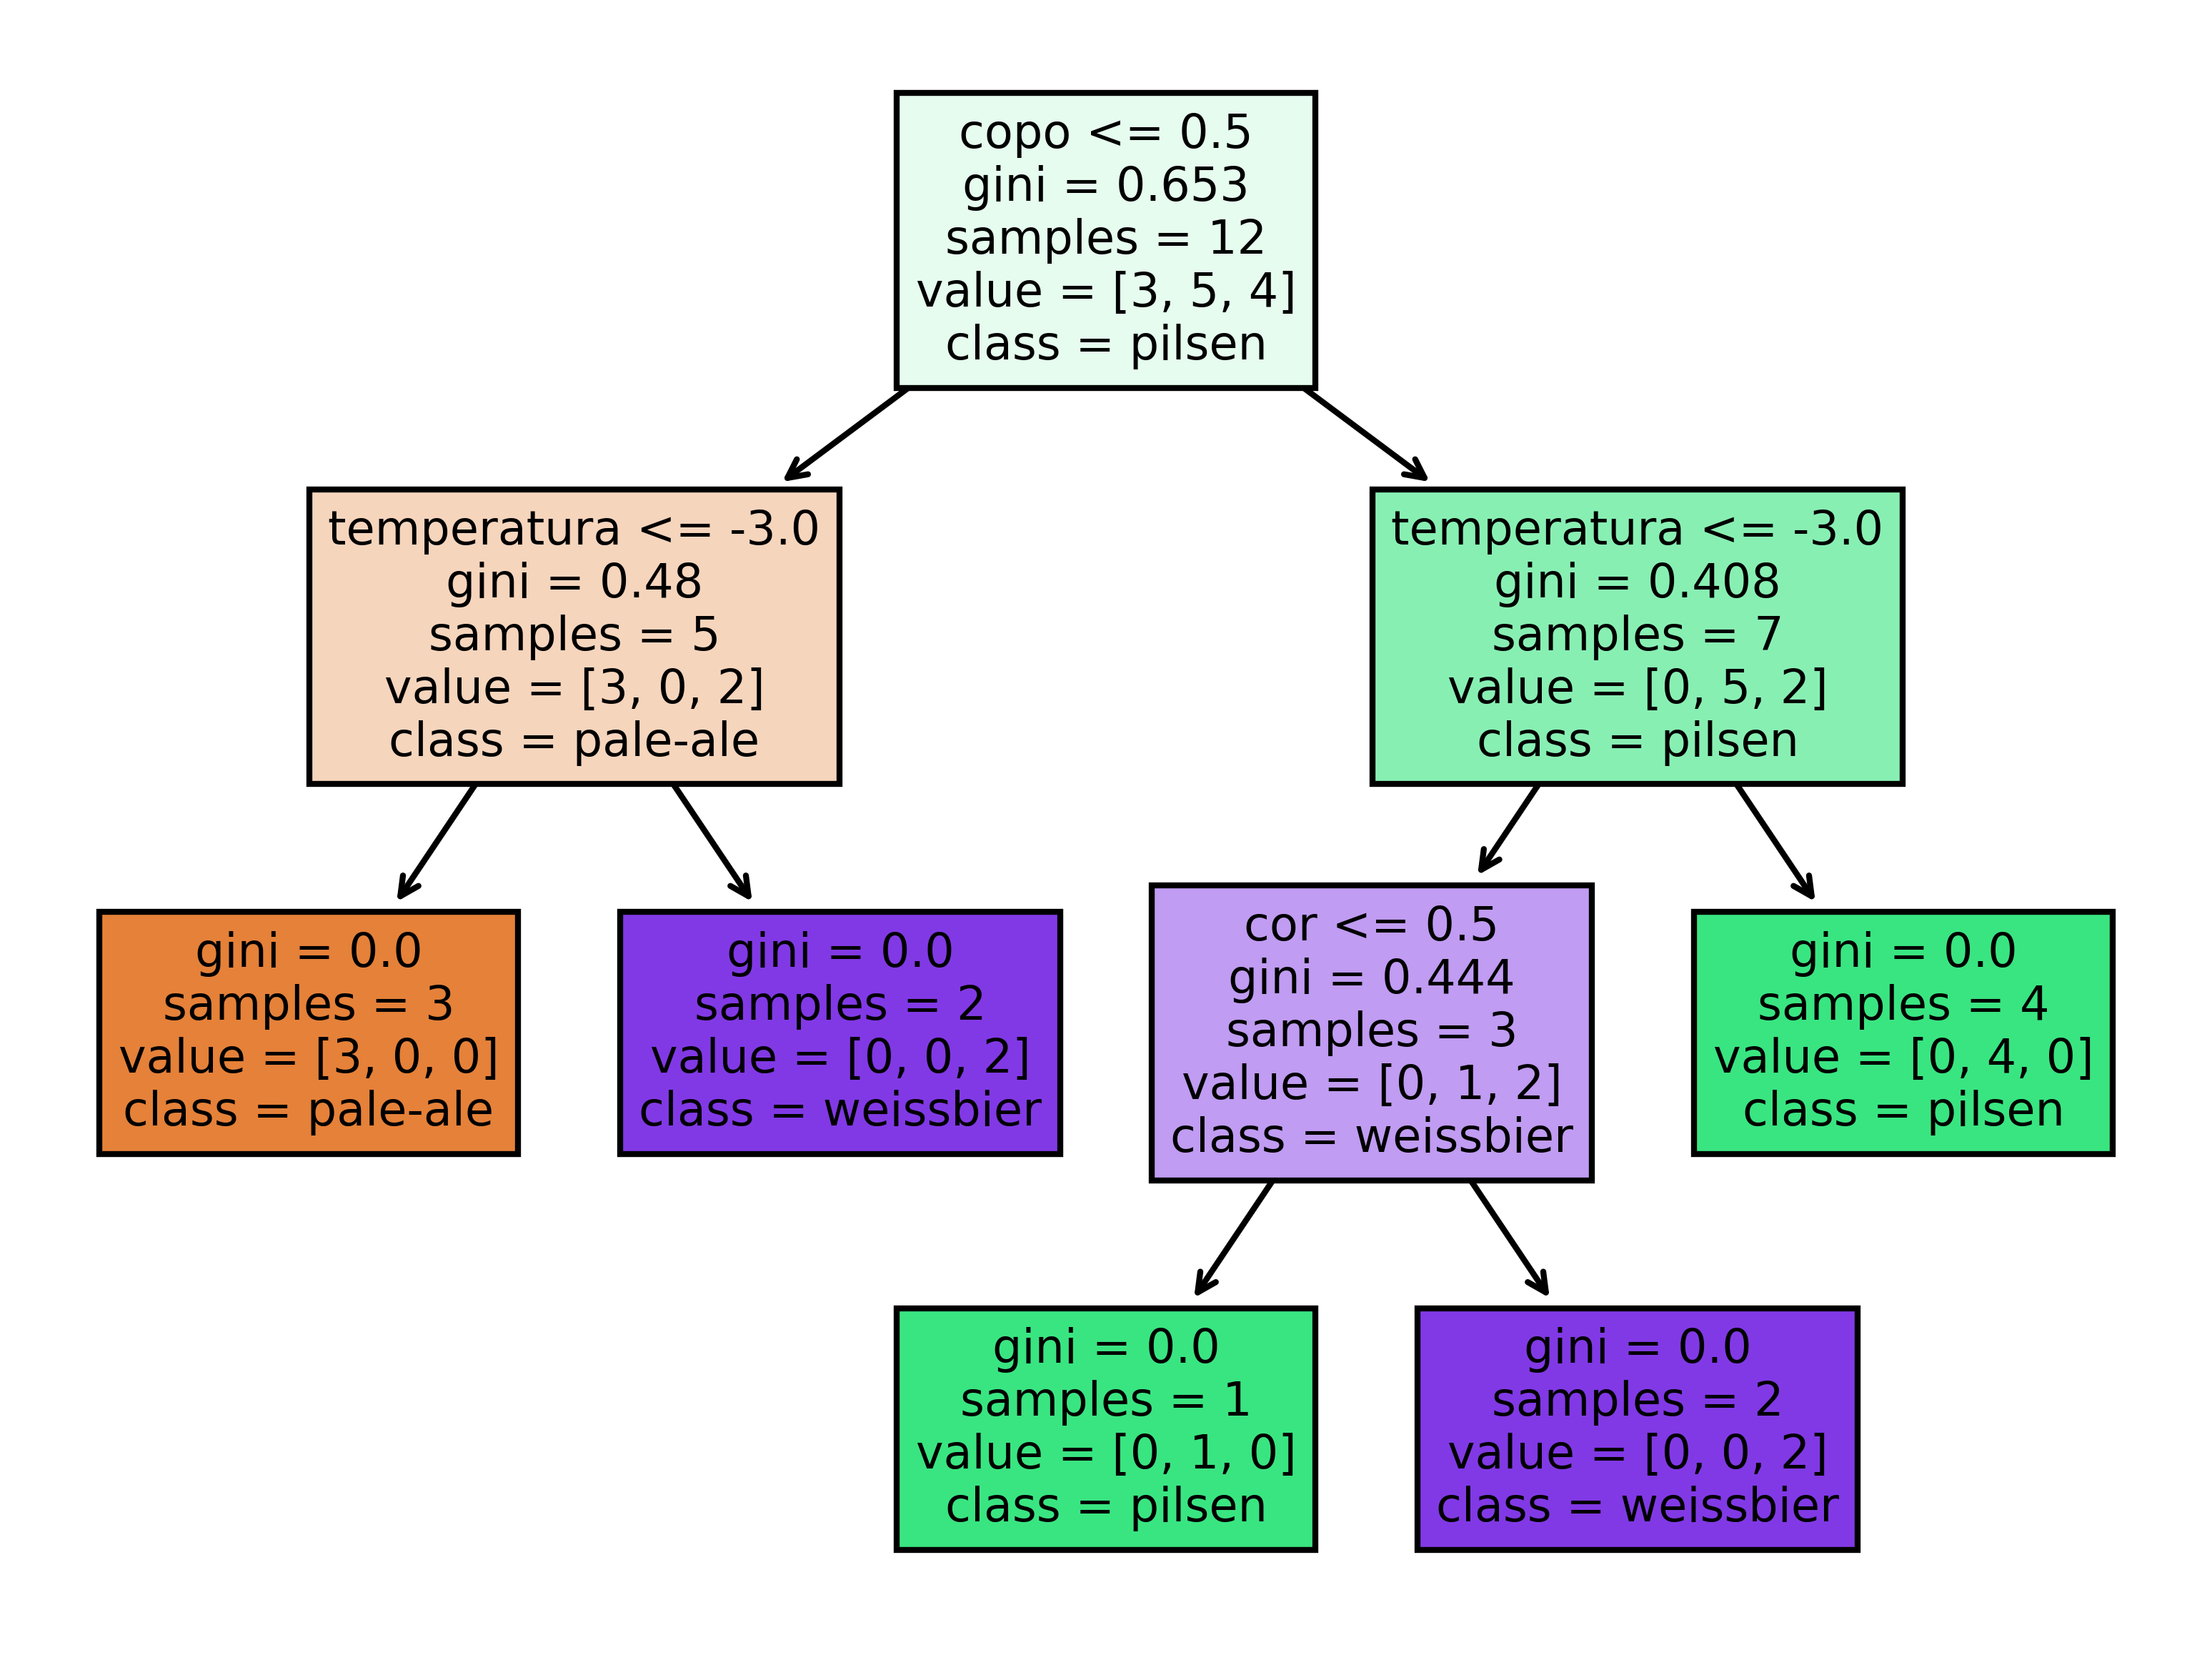

In [8]:
## Como podemos fazer a máquina aprender?

features = ["temperatura","copo","espuma","cor"]
target = "classe"

X = df[features]
y = df[target]

# %%

X = X.replace({
    "mud":1, "pint":0,
    "sim":1, "não":0,
    "escura":1, "clara":0,    
})

X

# %%
from sklearn import tree

arvore = tree.DecisionTreeClassifier(random_state=42)
arvore.fit(X, y)

# %%

import matplotlib.pyplot as plt

plt.figure(dpi=600)

tree.plot_tree(arvore,
            class_names=arvore.classes_,
            feature_names=features,
            filled=True)

# %%
# "temperatura","copo","espuma","cor"

probas = arvore.predict_proba([[-5, 1, 0, 1]])[0]

pd.Series(probas, index=arvore.classes_)